In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os 
import numpy as np
import openml

In [39]:
res_folder = 'openml_res/openml_kdf_res/'
files = os.listdir(res_folder)
files.remove('.DS_Store')

In [40]:
def plot_file_err(file, folder, ax=None, ticksize=25, fontsize=30):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 8), sharey=True, sharex=True, constrained_layout=True)
    
    data_id = file[:-4]
    data_id = int(data_id[8:])

    dataset = openml.datasets.get_dataset(data_id)
    X, y, is_categorical, _ = dataset.get_data(
            dataset_format="array", target=dataset.default_target_attribute
        )
    total_classes = np.unique(y)

    df = pd.read_csv(folder+'/'+file)
    samples = np.unique(df['samples'])

    title_strng = str(len(total_classes)*samples[-1]) + ',' + str(X.shape[1]) +',' + str(len(total_classes))
    err_kdf_med = []
    err_kdf_25 = []
    err_kdf_75 = []
    err_rf_med = []
    err_rf_25 = []
    err_rf_75 = []
    

    for sample in samples:
        kdf = df['err_kdf'][df['samples']==sample]
        rf = df['err_rf'][df['samples']==sample]
        
        err_kdf_med.append(
            np.median(kdf)
        )
        qunatiles = np.quantile(kdf,[.25,.75],axis=0)
        err_kdf_25.append(
            qunatiles[0]
        )
        err_kdf_75.append(
            qunatiles[1]
        )

        err_rf_med.append(
            np.median(rf)
        )
        qunatiles = np.quantile(rf,[.25,.75],axis=0)
        err_rf_25.append(
            qunatiles[0]
        )
        err_rf_75.append(
            qunatiles[1]
        )


    samples = np.unique(df['samples'])
    ax.hlines(1-1/len(total_classes), 0, samples[-1], colors='k', linestyles='dashed')
    ax.plot(samples, err_kdf_med, c='r', linewidth=5)
    ax.fill_between(samples, err_kdf_25, err_kdf_75, facecolor='r', alpha=.3)
    ax.plot(samples, err_rf_med, c='b', linewidth=5)
    ax.fill_between(samples, err_rf_25, err_rf_75, facecolor='b', alpha=.3)
    
    #ax.set_xticks([])
    #ax.set_yticks([0, 1])
    ax.tick_params(labelsize=ticksize)
    #ax.set_xscale("log")
    ax.set_title(title_strng, fontsize=fontsize)

In [41]:
def plot_file_ece(file, folder, ax=None, ticksize=25, fontsize=30):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    
    data_id = file[:-4]
    data_id = int(data_id[8:])

    dataset = openml.datasets.get_dataset(data_id)
    X, y, is_categorical, _ = dataset.get_data(
            dataset_format="array", target=dataset.default_target_attribute
        )
    total_classes = np.unique(y)

    df = pd.read_csv(folder+'/'+file)
    
    samples = np.unique(df['samples'])

    title_strng = str(len(total_classes)*samples[-1]) + ', ' + str(X.shape[1]) +', ' + str(len(total_classes)) 
    err_kdf_med = []
    err_kdf_25 = []
    err_kdf_75 = []
    err_rf_med = []
    err_rf_25 = []
    err_rf_75 = []
    err_rf_max_med = []
    err_rf_max_25 = []
    err_rf_max_75 = []
    err_kdt_med = []
    err_kdt_25 = []
    err_kdt_75 = []
    err_tree_med = []
    err_tree_25 = []
    err_tree_75 = []

    for sample in samples:
        kdf = df['ece_kdf'][df['samples']==sample]
        rf = df['ece_rf'][df['samples']==sample]
        

        err_kdf_med.append(
            np.median(kdf)
        )
        qunatiles = np.quantile(kdf,[.25,.75],axis=0)
        err_kdf_25.append(
            qunatiles[0]
        )
        err_kdf_75.append(
            qunatiles[1]
        )

        err_rf_med.append(
            np.median(rf)
        )
        qunatiles = np.quantile(rf,[.25,.75],axis=0)
        err_rf_25.append(
            qunatiles[0]
        )
        err_rf_75.append(
            qunatiles[1]
        )

    '''y_max = np.round(np.max(err_rf_med[2:]),1)
    y_max += np.round(y_max/3,2)
    y_min = 0'''  
      
    samples = np.unique(df['samples'])
    ax.plot(samples[2:], err_kdf_med[2:], c='r', linewidth=5)
    ax.fill_between(samples[2:], err_kdf_25[2:], err_kdf_75[2:], facecolor='r', alpha=.3)
    ax.plot(samples[2:], err_rf_med[2:], c='b', linewidth=5)
    ax.fill_between(samples[2:], err_rf_25[2:], err_rf_75[2:], facecolor='b', alpha=.3)
    
    #ax.set_yticks([y_min, y_max])
    ax.tick_params(axis='both', which='major', labelsize=40)
    ax.set_title(title_strng, fontsize=fontsize)

In [42]:
def plot_file_param(file, folder, ax=None, ticksize=25, fontsize=40):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    
    data_id = file[:-4]
    data_id = int(data_id[8:])

    dataset = openml.datasets.get_dataset(data_id)
    X, y, is_categorical, _ = dataset.get_data(
            dataset_format="array", target=dataset.default_target_attribute
        )
    total_classes = np.unique(y)

    df = pd.read_csv(folder+'/'+file)
    
    samples = np.unique(df['samples'])

    title_strng = str(len(total_classes)*samples[-1]) + ', ' + str(X.shape[1]) +', ' + str(len(total_classes)) 
    param_med = []
    param_25 = []
    param_75 = []
    

    for sample in samples:
        kdf = np.array(df['kdf_param'][df['samples']==sample])
        rf = np.array(df['rf_param'][df['samples']==sample])
        

        param_med.append(
            np.median(kdf/rf)
        )
        
        qunatiles = np.quantile(kdf/rf,[.25,.75],axis=0)
        param_25.append(
            qunatiles[0]
        )
        param_75.append(
            qunatiles[1]
        )
      
    samples = np.unique(df['samples'])
    ax.plot(samples[2:], param_med[2:], c='r', linewidth=5)
    ax.fill_between(samples[2:], param_25[2:], param_75[2:], facecolor='r', alpha=.3)
    
    #ax.set_yticks([y_min, y_max])
    ax.tick_params(axis='both', which='major', labelsize=40)
    ax.set_title(title_strng, fontsize=fontsize)

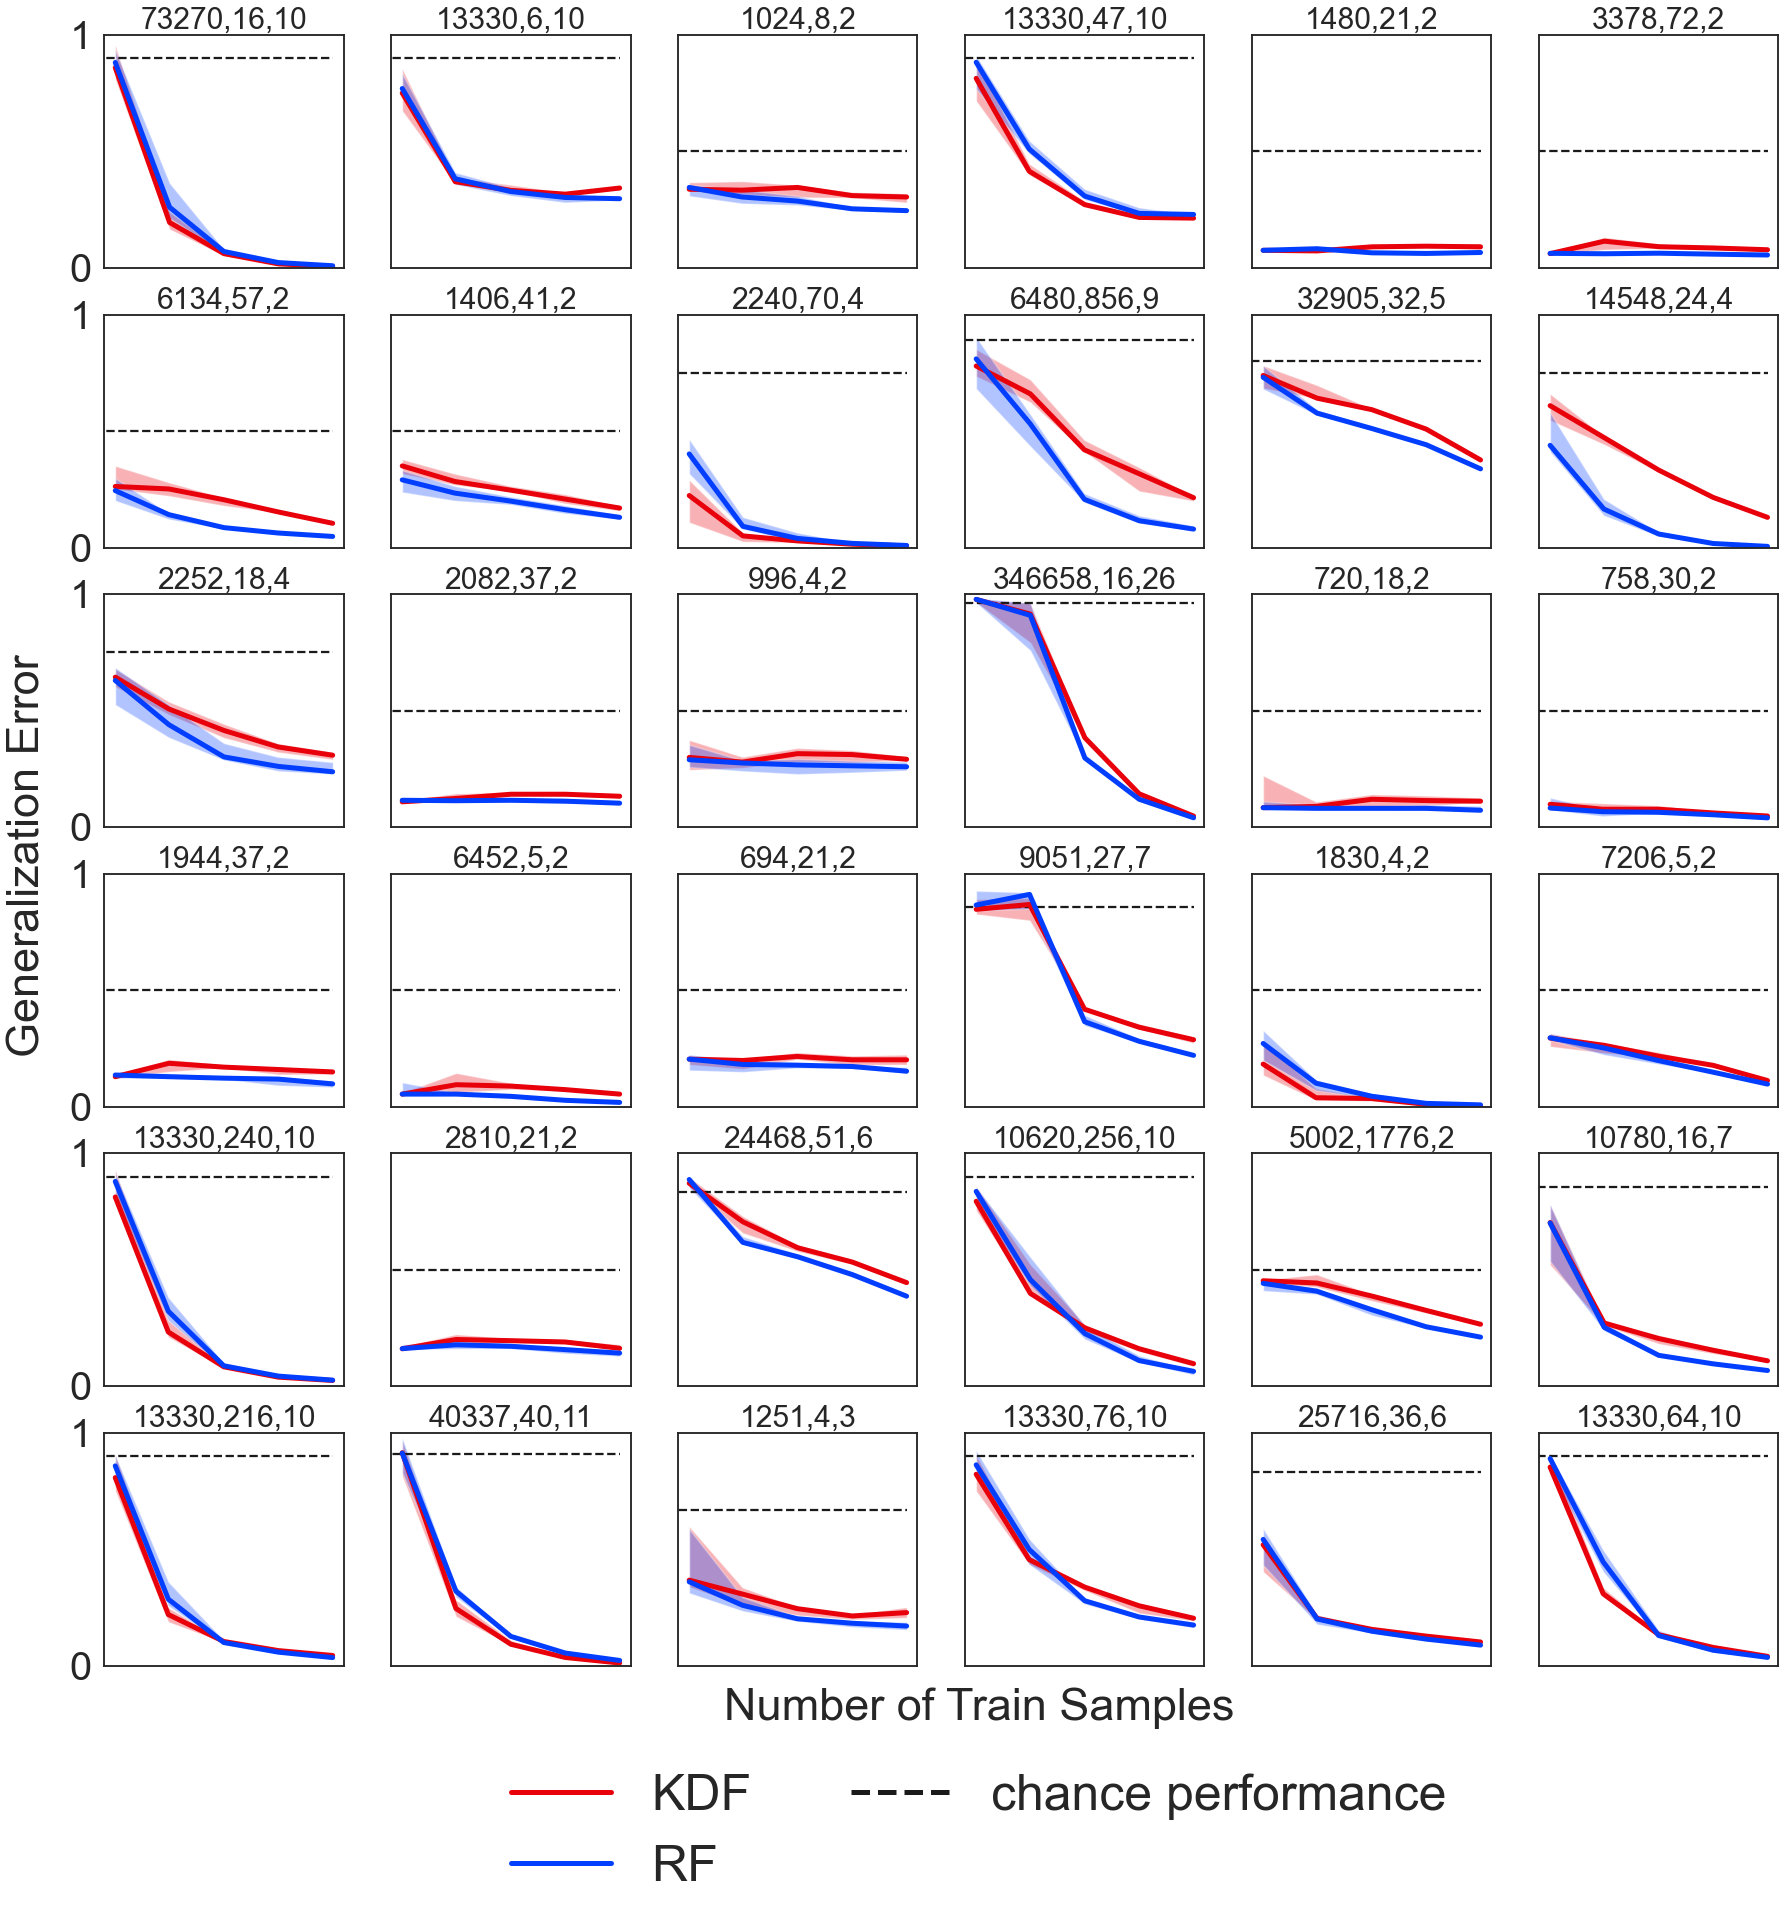

In [43]:
rows = 6
cols = 6

# Define color palette
sns.set(
    color_codes=True, palette="bright", style="white", context="talk", font_scale=1.5
)

fig, ax = plt.subplots(rows, cols, figsize=(cols*5, rows*5))
fig.text(0.53, 0.1, "Number of Train Samples", ha="center", fontsize=45)
fig.text(0.08, 0.5, "Generalization Error", va="center", rotation="vertical", fontsize=45)

ax[0][0].plot(0, 0, c='r', linewidth=5, label='KDF')
ax[0][0].plot(0, 0, c='b', linewidth=5, label='RF')
ax[0][0].plot(0, 0, c='k', linestyle='dashed', label='chance performance')

for row in range(rows):
    for col in range(cols):
        #print(files[row*cols + col])
        plot_file_err(files[row*cols + col],res_folder, ax=ax[row][col])

        if col == 0:
            ax[row][col].set_yticks([0, 1])
        else:
            ax[row][col].set_yticks([])
        
        ax[row][col].set_xscale("log")
        ax[row][col].tick_params(axis='both', which='major', labelsize=40)
        ax[row][col].set_ylim([0,1])
        ax[row][col].set_xticks([])

fig.align_ylabels(
    ax[
        :,
    ]
)
leg = fig.legend(
    fontsize=50,
    frameon=False,
    bbox_to_anchor=(0.53, 0.0),
    bbox_transform=plt.gcf().transFigure,
    ncol=2,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
    
plt.savefig("plots/openml_err.pdf", transparent=True, bbox_inches="tight")

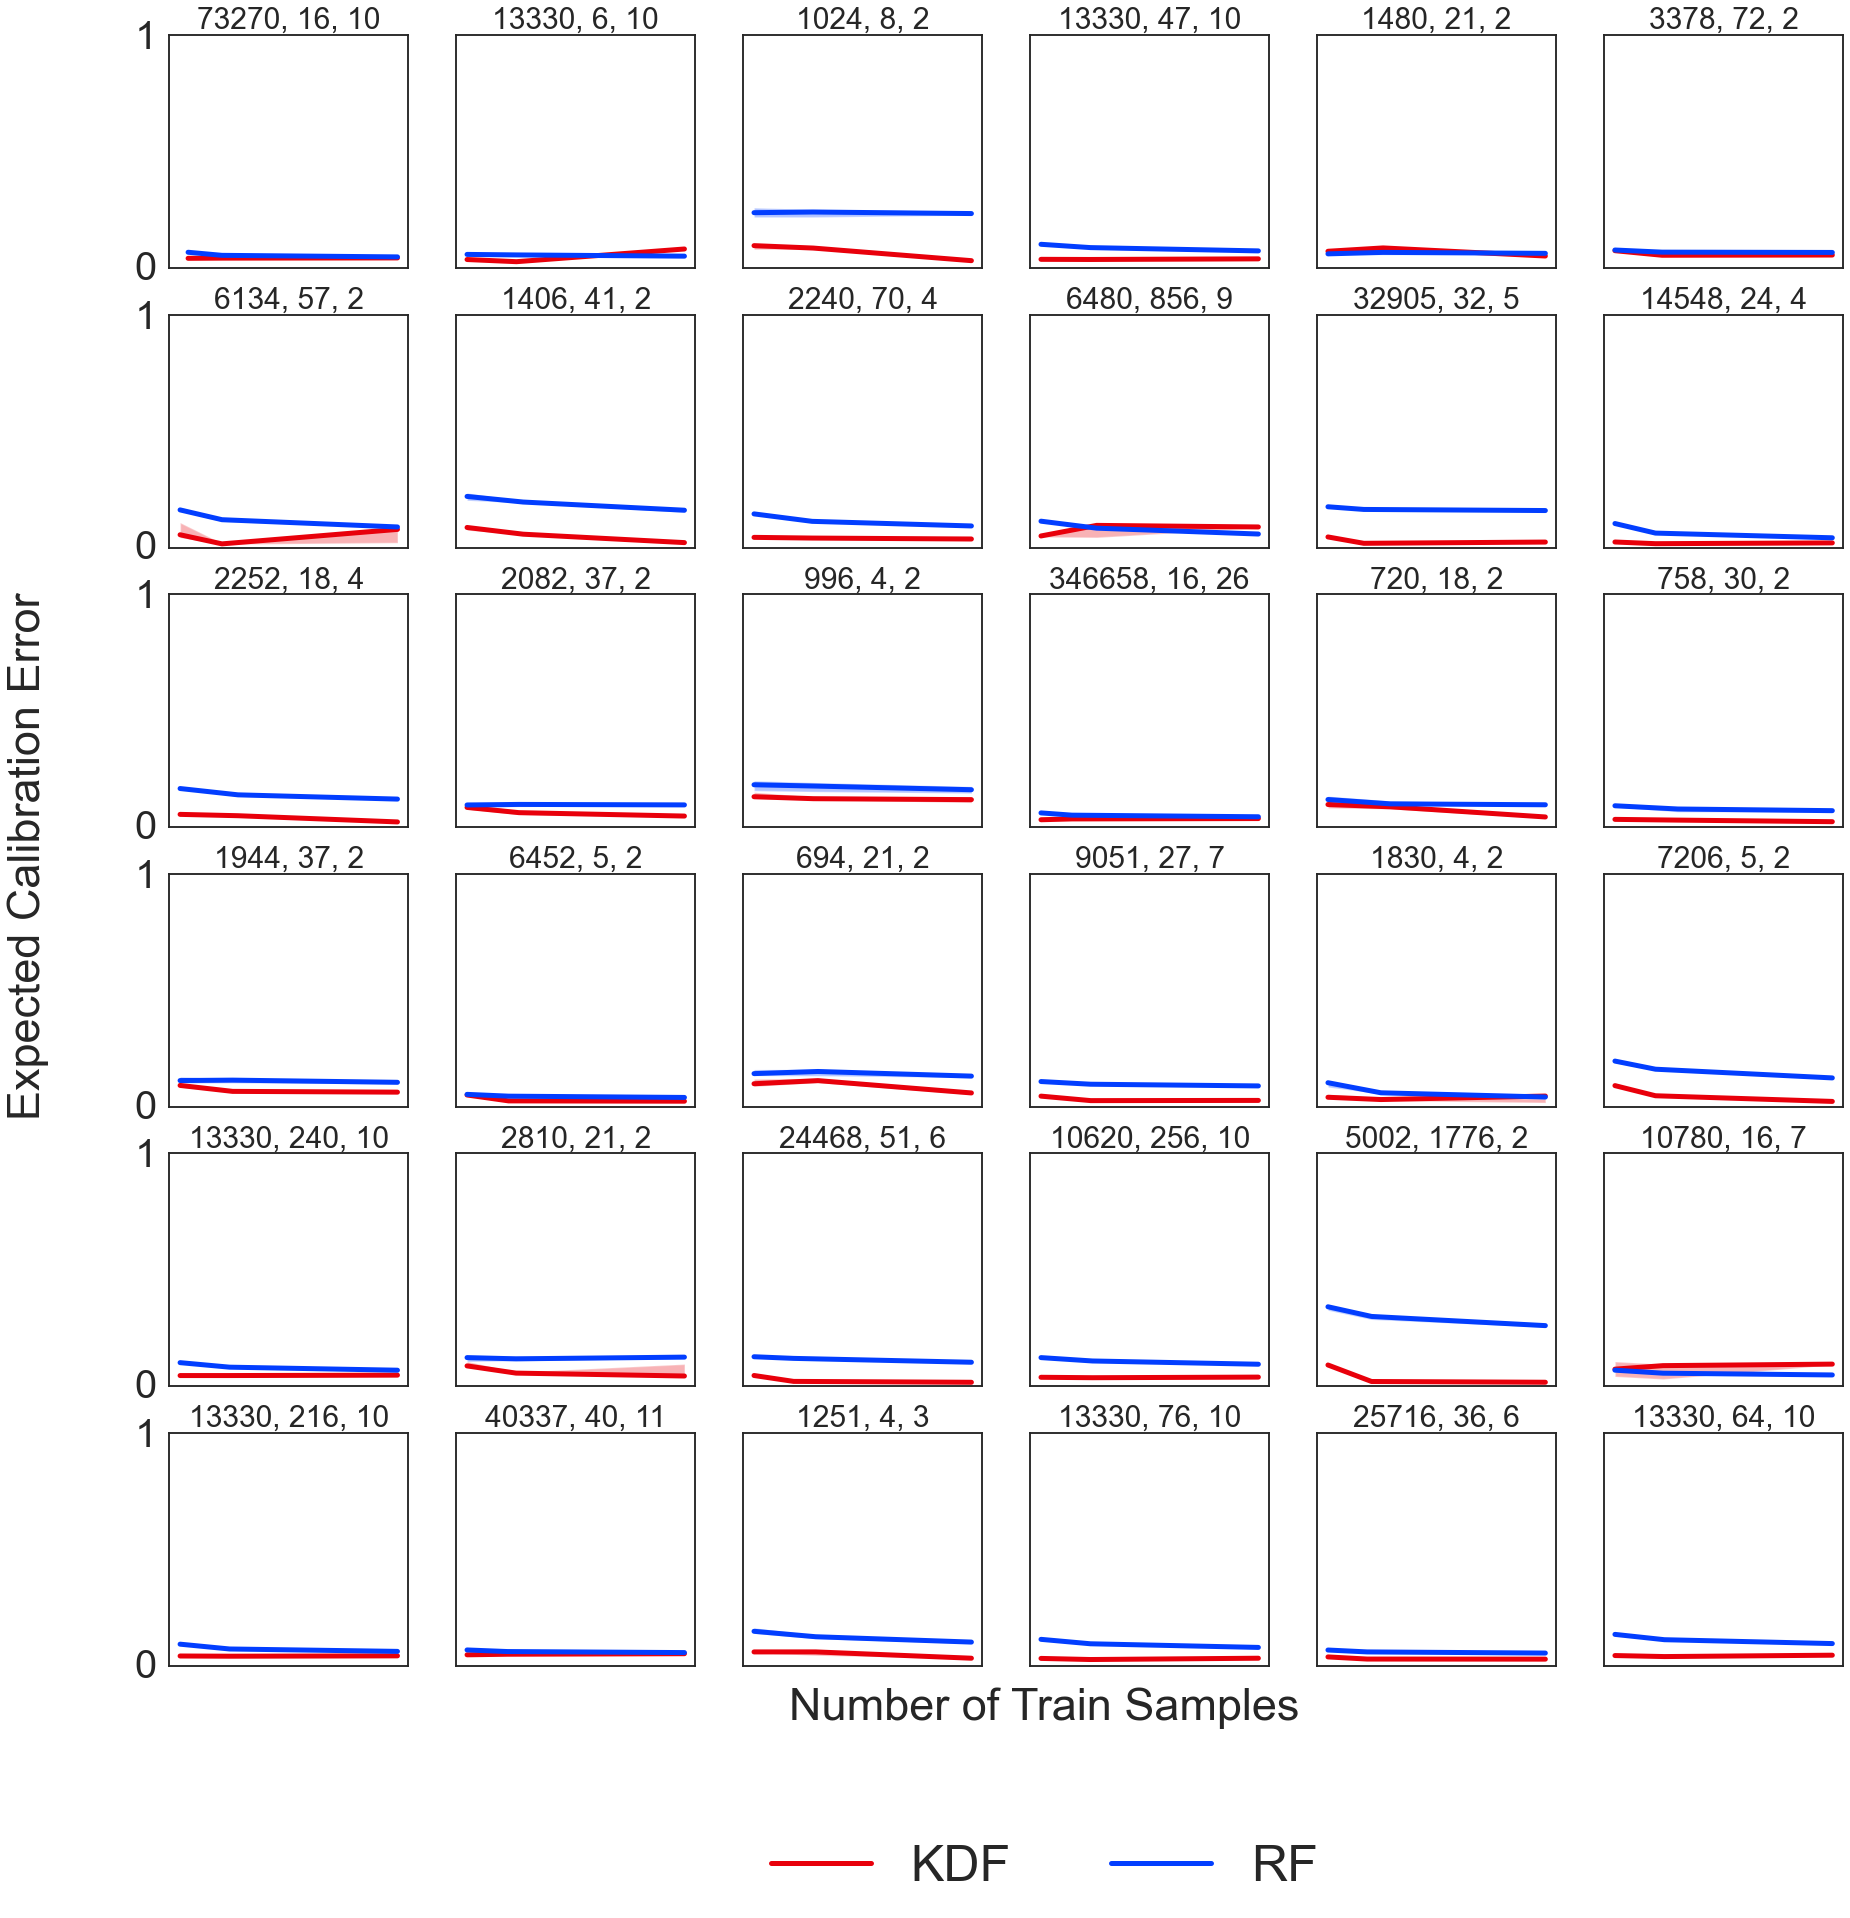

In [44]:
rows = 6
cols = 6

# Define color palette
sns.set(
    color_codes=True, palette="bright", style="white", context="talk", font_scale=1.5
)

fig, ax = plt.subplots(rows, cols, figsize=(cols*5, rows*5))
fig.text(0.53, 0.1, "Number of Train Samples", ha="center", fontsize=45)
fig.text(0.05, 0.5, "Expected Calibration Error", va="center", rotation="vertical", fontsize=45)

ax[0][0].plot(0, 0, c='r', linewidth=3, label='KDF')
ax[0][0].plot(0, 0, c='b', linewidth=2, label='RF')

for row in range(rows):
    for col in range(cols):
        plot_file_ece(files[row*cols + col],res_folder, ax=ax[row][col])
        
        if col == 0:
            ax[row][col].set_yticks([0, 1])
        else:
            ax[row][col].set_yticks([])
        
        #ax[row][col].set_xscale("log")
        ax[row][col].tick_params(axis='both', which='major', labelsize=40)
        ax[row][col].set_ylim([-0.01,1])
        ax[row][col].set_xticks([])
        
fig.align_ylabels(
    ax[
        :,
    ]
)
leg = fig.legend(
    fontsize=50,
    frameon=False,
    bbox_to_anchor=(0.53, 0.0),
    bbox_transform=plt.gcf().transFigure,
    ncol=2,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)

plt.savefig("plots/openml_ece.pdf", transparent=True, bbox_inches="tight")

In [49]:
def plot_summary_error(file, folder, label = True, ax=None):
    colors = ["r", "b"]

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 8), sharey=True, sharex=True, constrained_layout=True)

    df = pd.read_csv(folder+'/'+file)
    samples = np.unique(df['samples'])
    err_kdf_med = []
    err_rf_med = []
    bool_fill = []
    bool_not_fill = []

    for sample in samples:
        kdf = df['err_kdf'][df['samples']==sample]
        rf = df['err_rf'][df['samples']==sample]
        
        err_kdf_med.append(
            np.median(kdf)
        )

        err_rf_med.append(
            np.median(rf)
        )

        bool_fill.append(err_kdf_med[-1]<=err_rf_med[-1])
        bool_not_fill.append(err_kdf_med[-1]>err_rf_med[-1])

    samples = np.unique(df['samples'])

    if label:
        ax.fill_between(samples, err_kdf_med, err_rf_med, where= bool_fill, interpolate=True, color='r', alpha=.3, label = 'KDF wins')
        ax.fill_between(samples, err_kdf_med, err_rf_med, where= bool_not_fill, interpolate=True, color='b', alpha=.3, label = 'RF wins')
    else:
        ax.fill_between(samples, err_kdf_med, err_rf_med, where= bool_fill, interpolate=True, color='r', alpha=.3)
        ax.fill_between(samples, err_kdf_med, err_rf_med, where= bool_not_fill, interpolate=True, color='b', alpha=.3)

    return False


In [50]:
def plot_summary_ece(file, folder, ax=None):
    colors = ["r", "b"]

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 8), sharey=True, sharex=True, constrained_layout=True)

    df = pd.read_csv(folder+'/'+file)
    samples = np.unique(df['samples'])
    ece_kdf_med = []
    ece_rf_med = []
    bool_fill = []
    bool_not_fill = []

    for sample in samples:
        kdf = df['ece_kdf'][df['samples']==sample]
        rf = df['ece_rf'][df['samples']==sample]
        
        ece_kdf_med.append(
            np.median(kdf)
        )

        ece_rf_med.append(
            np.median(rf)
        )

        bool_fill.append(ece_kdf_med[-1]<=ece_rf_med[-1])
        bool_not_fill.append(ece_kdf_med[-1]>ece_rf_med[-1])

    samples = np.unique(df['samples'])
    ax.fill_between(samples, ece_kdf_med, ece_rf_med, where= bool_fill, interpolate=True, color='r', alpha=.3)
    ax.fill_between(samples, ece_kdf_med, ece_rf_med, where= bool_not_fill, interpolate=True, color='b', alpha=.3)


In [51]:
def plot_summary_param(file, folder, ax=None):
    colors = ["r", "b"]

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 8), sharey=True, sharex=True, constrained_layout=True)

    df = pd.read_csv(folder+'/'+file)
    samples = np.unique(df['samples'])
    param_kdf_med = []
    param_rf_med = []
    bool_fill = []
    bool_not_fill = []

    for sample in samples:
        kdf = df['kdf_param'][df['samples']==sample]
        rf = df['rf_param'][df['samples']==sample]
        
        param_kdf_med.append(
            np.median(kdf)
        )

        param_rf_med.append(
            np.median(rf)
        )

        bool_fill.append(param_kdf_med[-1]<=param_rf_med[-1])
        bool_not_fill.append(param_kdf_med[-1]>param_rf_med[-1])

    samples = np.unique(df['samples'])
    ax.fill_between(samples, param_kdf_med, param_rf_med, where= bool_fill, interpolate=True, color='r', alpha=.3)
    ax.fill_between(samples, param_kdf_med, param_rf_med, where= bool_not_fill, interpolate=True, color='b', alpha=.3)


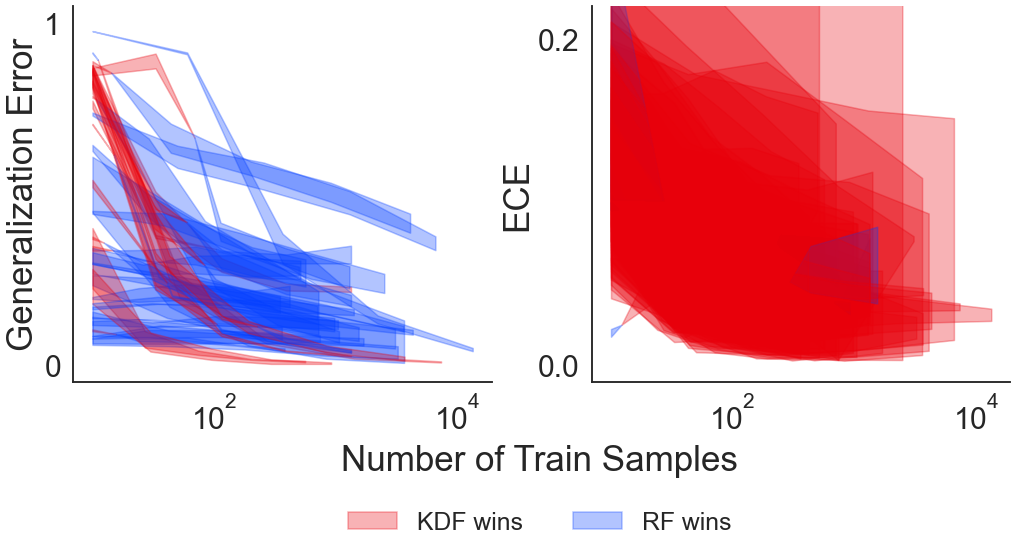

In [54]:
sns.set(
    color_codes=True, palette="bright", style="white", context="talk", font_scale=1.5
)

fig, ax = plt.subplots(1, 2, figsize=(14,6), constrained_layout=True)
fig.text(0.53, -0.08, "Number of Train Samples", ha="center", fontsize=35)
label = True

for file in files:
    label = plot_summary_error(file, res_folder, label, ax=ax[0])
    plot_summary_ece(file, res_folder, ax=ax[1])
   # plot_summary_param(file, res_folder, ax=ax[2])

ax[0].set_xscale("log")
ax[1].set_xscale("log")
#ax[2].set_xscale("log")

ax[0].set_ylim([-0.05, 1.05])
ax[0].set_yticks([0,1])
ax[0].set_ylabel('Generalization Error', fontsize=35)

ax[1].set_ylim([-0.01, 0.22])
ax[1].set_yticks([0,0.2])
ax[1].set_ylabel('ECE', fontsize=35)

for i in range(2):
     ax[i].tick_params(labelsize=30)
     right_side = ax[i].spines["right"]
     right_side.set_visible(False)
     top_side = ax[i].spines["top"]
     top_side.set_visible(False)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.28),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)

plt.savefig("plots/cc18_fill.pdf", transparent=True, bbox_inches="tight")